<a href="https://colab.research.google.com/github/LucasRobles2323/Tarea1-MetodosNumericos/blob/main/Tarea_1_Pregunta3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 3
Use el m´etodo de la bisecci´on para determinar el coeficiente de elasticidad (o arrastre) necesario para
que un saltador con masa 80[kg] alcance una velocidad de 36[m/s] despu´es de 4[s] de ca´ıda libre. Note
que la aceleraci´on de gravedad es 9,81[m/s2
]. El intervalo inicial [a, b] = [0,1; 0,2] e itere hasta que el
error relativo aproximado sea menor a 2 %.

Muestre los resultados en una tabla con las siguiente columnas:

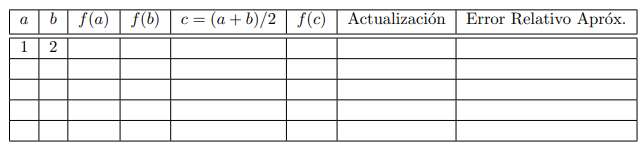

### Formula
$f(c_d) = \sqrt{\frac{gm}{c_d}}tanh(\sqrt{\frac{gc_d}{m}}t) - v$;   
siendo $c_d$ el coeficiente de elasticidad.

Del enunciado se extrean los valores de:

* $g = 9,81 [\frac{m}{s^2}]$

* $m = 80 [Kg]$

* $t = 4[s]$

* $v = 36 [\frac{m}{s^2}]$

Para el calculo del error relativo se obtuvo el valor verdadero mediante geogebra.

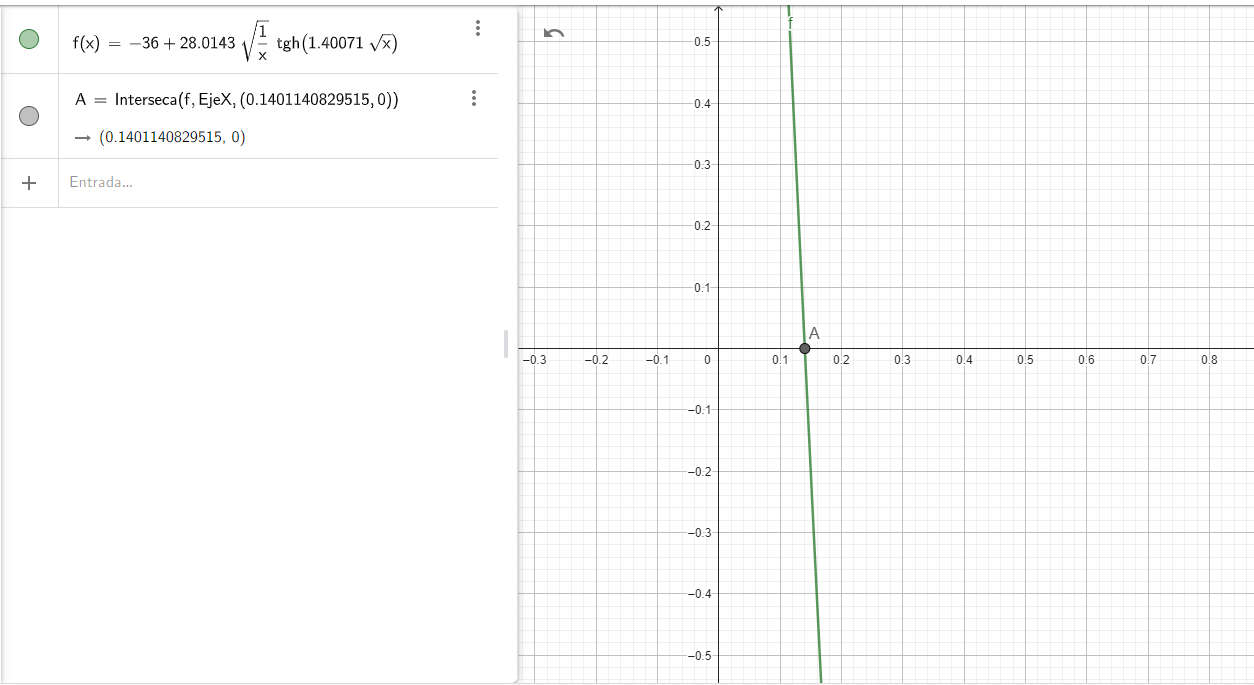




In [27]:

import numpy as np
import pandas as pd

def func(x):

  g = 9.81
  m = 80
  v = 36
  t = 4
  app = (np.sqrt((g*m)/x)*np.tanh(np.sqrt((g*x)/m)*t))-v
  return app

def valorC(a,b):
  resultado = (a+b)/2
  return resultado

def error(valor_aprox):

  valor_vdd = 0.1401140829515
  return abs((valor_vdd - valor_aprox)/valor_vdd)




In [40]:

def main(a,b):
  #Listas
  arr_a=[]
  arr_b=[]
  arr_c=[]
  arr_fa=[]
  arr_fb=[]
  arr_fc=[]
  update = []
  arr_error = []


  c = valorC(a,b)
  err = 1
  aux = 0

  #for i in range(5):
  
  while err >= 0.02:

    arr_a.append(a)
    arr_b.append(b)
    arr_c.append(c)

    f_a = func(a) #Funcion evaluada en a
    f_b = func(b) #Funcoin evaluada en b
    f_c = func(c) #Funcion evaluada en c / aproximacion

    arr_fa.append(f_a)
    arr_fb.append(f_b)
    arr_fc.append(f_c)

    #calculo update
    up = f_c - aux
    update.append(up)

    # condiciones
    if f_a * f_c > 0:
      a = c

    if f_b * f_c > 0:
      b = c

    #calulo de error
    err = error(c)
    arr_error.append(err)
    aux = f_c

    c= valorC(a,b)

  print("Valor verdadero:",0.1401140829515)
  print("Valor aproximado:",c)
  print("Error relativo aproximado:",round(err*100,1),"%")

  # TABLA
  df = pd.DataFrame({'a':arr_a,
                     'b':arr_b,
                     'c':arr_c,
                     'f(a)':arr_fa,
                     'f(b)':arr_fb,
                     'f(c)':arr_fc,
                     'Update':update,
                     'Error rel app':arr_error })

  print()
  print("#"*10)
  print("TABLA")
  print("#"*10)
  print(df)







In [41]:
main(0.1,0.2)




Valor verdadero: 0.1401140829515
Valor aproximado: 0.14375000000000002
Error relativo aproximado: 1.9 %

##########
TABLA
##########
       a     b       c      f(a)      f(b)      f(c)    Update  Error rel app
0  0.100  0.20  0.1500  0.860291 -1.197380 -0.204516 -0.204516       0.070556
1  0.100  0.15  0.1250  0.860291 -0.204516  0.318407  0.522924       0.107870
2  0.125  0.15  0.1375  0.318407 -0.204516  0.054639 -0.263768       0.018657
